<a href="https://colab.research.google.com/github/ShreyaMohanty12/Task1_GRIP-AUGUST-21/blob/main/TSF_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name** : Shreya Mohanty
# **Batch** : August '21

# **Task** : 3 - Exploratory Data Analysis - Retail

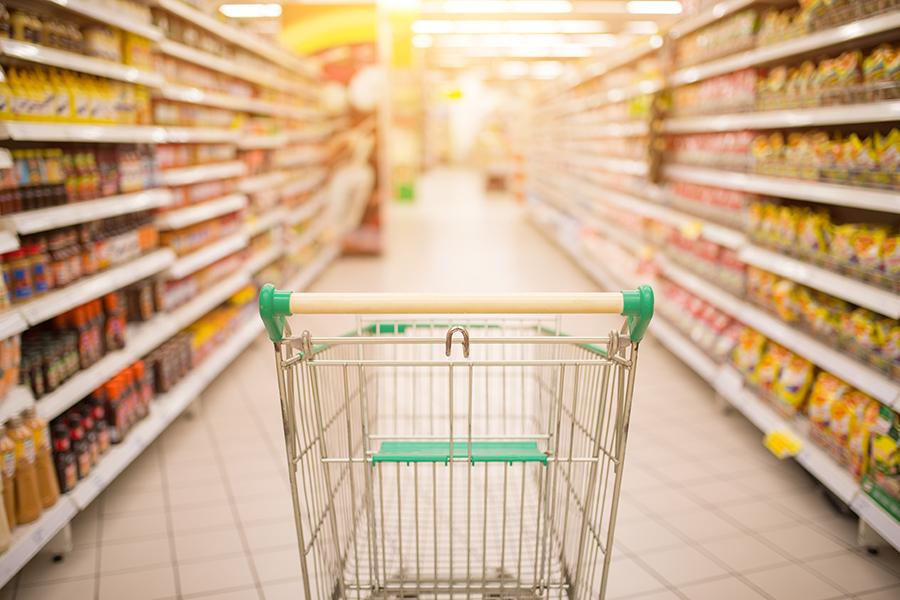

# Exploratory Data Analytics
Domain - Retail

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.


# *Importing necessary libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

sns.set_style('darkgrid')

# *Reading the dataset*

In [2]:
df = pd.read_csv('/content/SampleSuperstore.csv')

In [3]:
# Viewing a sample of the dataset 

df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7289,First Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Storage,305.010,9,0.0,76.2525
3246,Second Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Storage,324.900,5,0.0,38.9880
819,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,1228.465,5,0.3,0.0000
5911,Standard Class,Home Office,United States,Seattle,Washington,98115,West,Office Supplies,Storage,46.530,3,0.0,13.0284
8478,Standard Class,Home Office,United States,San Francisco,California,94110,West,Office Supplies,Art,5.760,2,0.0,1.6704


In [4]:
# Shape of the DataFrame

df.shape

(9994, 13)

In [5]:
# Displaying column names

df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# General information about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


It is observed that the dataset has no null value.Also, we get to know the data type of each column.


In [7]:
# Statistics of Data
df = df.drop(['Postal Code'],axis=1)
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Here the column of 'Postal Code' has no meaning. In fact, it is not necessary to use this column for model training.So, it may be convenient to drop this column 

# **DATA EXPLORATION**

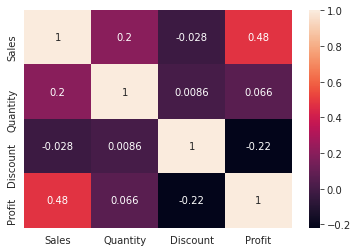

In [8]:
# Plotting Correlation between Features(Numeric)

corr = df.corr()
sns.heatmap(corr,annot=True);

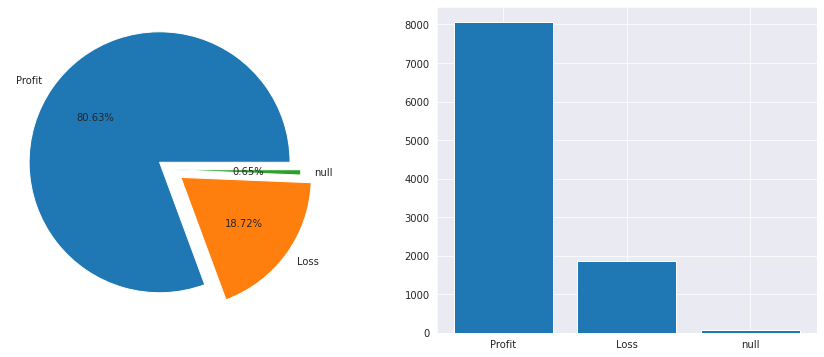

In [9]:
# Count of Profit / Loss / no_profit_no_loss in US

df_Profit = df[df['Profit']>0]
df_loss = df[df['Profit']<0]
df_null = df[df['Profit']==0]

stats = [df_Profit.shape[0],df_loss.shape[0],df_null.shape[0]]
labels = ['Profit','Loss','null']

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.pie(stats,labels=labels,explode=[0.1,0.1,0],autopct='%1.2f%%')
plt.subplot(122)
plt.bar(labels,stats);

##### **Note :**  The dataset contains 80.6 % cases of profit, 18.7 % cases of loss and 0.65 % cases of no-profit-no-loss . From this, we can probably say that the Retail store is working fine.

In [10]:
# Let's add a new column which signifies if a particular row incurs profit or gain 

x = []
for i in df['Profit']:
  if (i>0):
   x.append('Gain')
  elif (i<0):
   x.append('Loss')
  else :
   x.append('null') 

df['Gain/Loss'] = x
df.sample(2)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Gain/Loss
1023,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Envelopes,6.208,2,0.2,2.1728,Gain
3799,First Class,Corporate,United States,Greensboro,North Carolina,South,Technology,Phones,1359.960,5,0.2,118.9965,Gain


# *Examining features 'Ship Mode' and 'Segment'*

In [11]:
# Different classes in Ship Mode

print('Number of classes : ',df['Ship Mode'].nunique())
print('Different classes ', df['Ship Mode'].unique())

Number of classes :  4
Different classes  ['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [12]:
# Different classes of Segment

print('Number of classes ',df['Segment'].nunique())
print('Different classes ',df['Segment'].unique())

Number of classes  3
Different classes  ['Consumer' 'Corporate' 'Home Office']


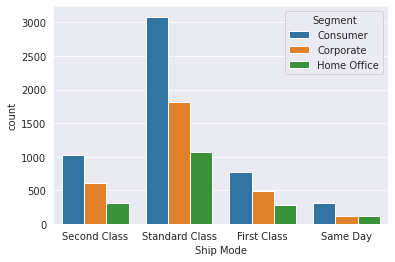

In [13]:
sns.countplot(x='Ship Mode',data=df,hue='Segment');

**Note :** The count of Standard Class is maximum. In each class, Consumer segment holds the majority. We may conclude that the stores prefer Consumer Segment as it may draw more profit.

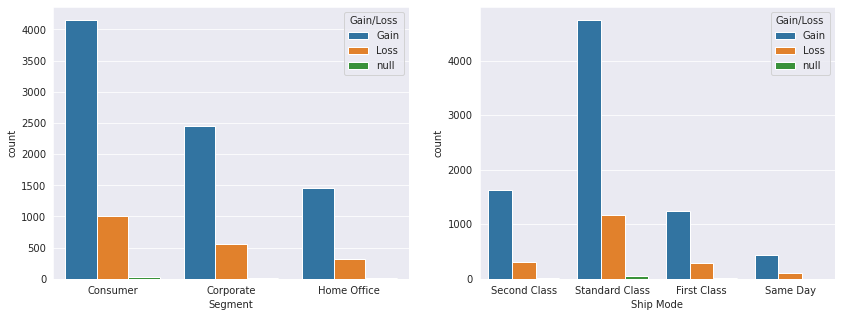

In [14]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.countplot(x='Segment',data=df,hue='Gain/Loss')
plt.subplot(122)
sns.countplot(x='Ship Mode',data=df,hue='Gain/Loss');

**Note** : Even though Consumer segment has highest gain, it also has slightly greater loss as compared to corporate and home office. 

In [15]:
# Analyzing net Profits based on feature 'Segment'.

df_segment = df.groupby('Segment').Profit.sum()

print('NET PROFIT IN EACH SEGMENT')
print(df_segment)

NET PROFIT IN EACH SEGMENT
Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


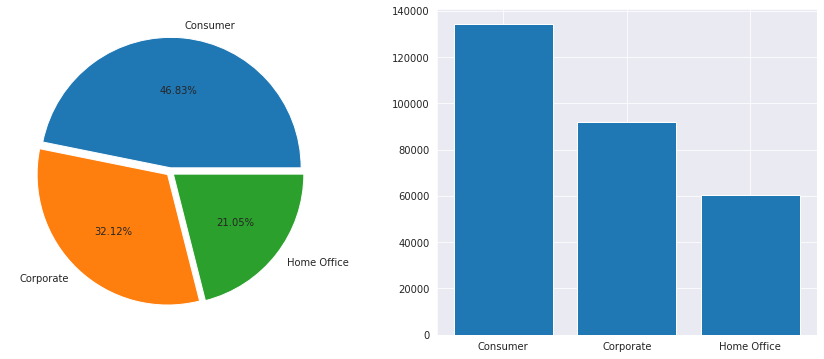

In [16]:
# Visualizing net Profits based on feature 'Segment'

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.pie(x=df_segment,labels=df_segment.index,autopct='%1.2f%%',explode=[0.03,0.03,0.03])
plt.subplot(122)
plt.bar(df_segment.index,df_segment);

**Note:** It is observed that Segment -'Customer' contributes to highest net profit followed by Corporate and then, Home Office.

In [17]:
# Analyzing net Profits based on feature 'hip ModSe'.

df_ShipMode = df.groupby('Ship Mode').Profit.sum()

print('NET PROFIT IN EACH SHIP MODE')
print(df_ShipMode)

NET PROFIT IN EACH SHIP MODE
Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64


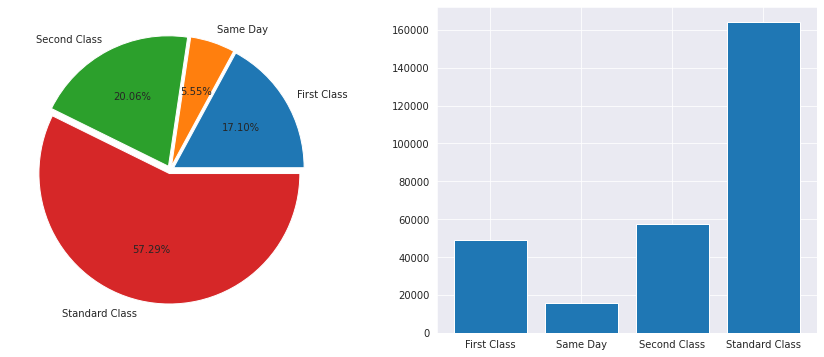

In [18]:
# Visualizing net Profits based on feature 'Ship Mode'

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.pie(x=df_ShipMode,labels=df_ShipMode.index,autopct='%1.2f%%',explode=[0.03,0.03,0.03,0.03])
plt.subplot(122)
plt.bar(df_ShipMode.index,df_ShipMode);

**Note :** Net profit is maximum for 'Standard Class' ship mode, followed by 'Second Class', 'First Class' and 'Same Day',


# *Analyzing features 'State' and 'City'*

In [19]:
# Total number of States in the dataset

df['State'].nunique()

49

In [20]:
# Grouping the values based on State and displaying the top 10 states with most profit

df.groupby('State').Profit.sum().sort_values(ascending=False)[:10]

# Creating a DataFrame on basis of States

profit_state = pd.DataFrame(df.groupby('State').sum()).sort_values('Profit',ascending=False)

profit_state.head()

,Sales,Quantity,Discount,Profit
State,,,,
California,457687.6315,7667,145.6,76381.3871
New York,310876.2710,4224,62.4,74038.5486
Washington,138641.2700,1883,32.4,33402.6517
Michigan,76269.6140,946,1.8,24463.1876
Virginia,70636.7200,893,0.0,18597.9504


In [21]:
# plot of state vs profits

px.bar(profit_state,x=profit_state.index,y='Profit',title='State vs Profit')

In [22]:
# Top 10 State in US with Highest Sales 

states_bySales = df.groupby('State').sum().sort_values('Sales',ascending=False)[:10]
px.pie(states_bySales,states_bySales.index,'Sales',title='Top 10 State in US with Highest Sales',hover_data=['Profit'])

**NOTE :** When we hover around Texas, we find that although Texas is the third highest State with highest sales, it has a negative Profit. 

In [23]:
states_byQuantity = df.groupby('State').sum().sort_values('Quantity',ascending=False)[:10]
px.pie(states_byQuantity,states_byQuantity.index,'Quantity',title='Top 10 State in US with Highest Quantity Sold',hover_data=['Profit'])

# *Analyzing feature 'Regions'*

In [24]:
 df_Region = pd.DataFrame(df.groupby('Region').sum())
 df_Region

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


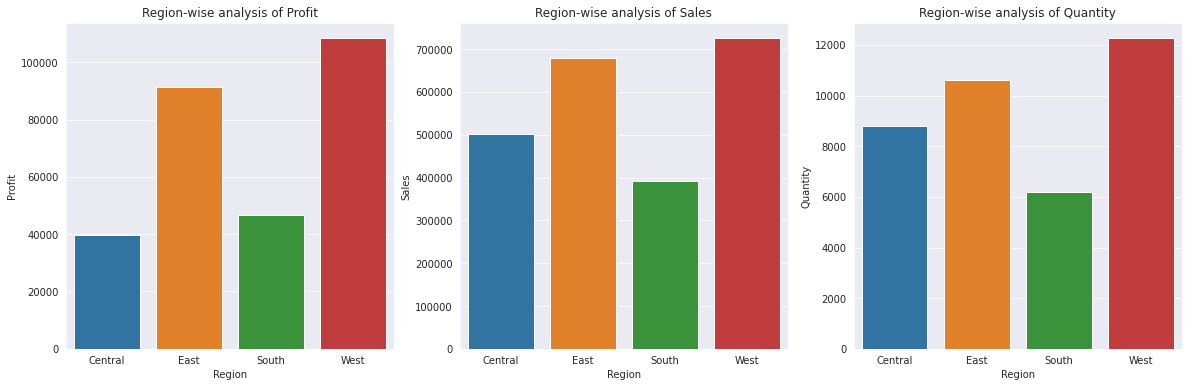

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.barplot(x=df_Region.index,y='Profit',data=df_Region)
plt.title('Region-wise analysis of Profit')
plt.subplot(132)
sns.barplot(x=df_Region.index,y='Sales',data=df_Region)
plt.title('Region-wise analysis of Sales')
plt.subplot(133)
sns.barplot(x=df_Region.index,y='Quantity',data=df_Region)
plt.title('Region-wise analysis of Quantity');

**Note** : West Region dominates Profit, Total Sales and Total quantity sold, followed by east region

In [26]:
central_profit = df[df['Region']=='Central'].groupby('Segment').sum()
east_profit = df[df['Region']=='East'].groupby('Segment').sum()
south_profit = df[df['Region']=='South'].groupby('Segment').sum()
west_profit = df[df['Region']=='West'].groupby('Segment').sum()

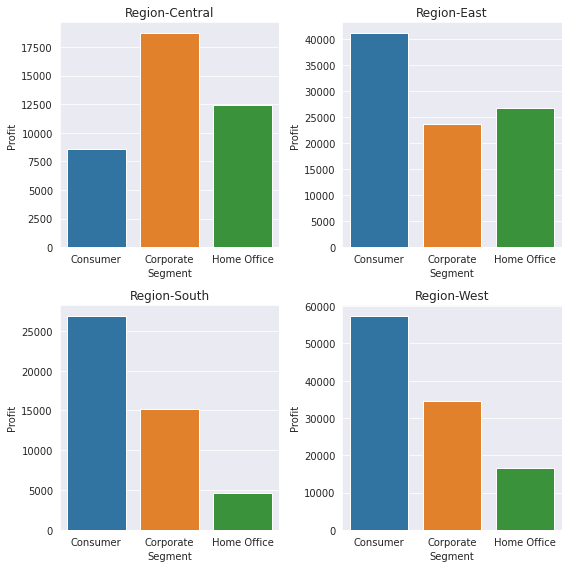

In [27]:
# Region-wise contribution to profit by Segment feature

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.barplot(x=central_profit.index,y=central_profit['Profit'],data=central_profit)
plt.title('Region-Central')

plt.subplot(2,2,2)
sns.barplot(x=east_profit.index,y=east_profit['Profit'],data=east_profit)
plt.title('Region-East')

plt.subplot(2,2,3)
sns.barplot(x=south_profit.index,y=south_profit['Profit'],data=south_profit)
plt.title('Region-South')

plt.subplot(2,2,4)
sns.barplot(x=west_profit.index,y=west_profit['Profit'],data=west_profit)
plt.title('Region-West')

plt.tight_layout()
plt.show()

We can observe that 'Consumer' Segment  dominates the Profits in East, West and South regions whereas 'Corporate' Segment dominates the Profits in Central region.

# *Analyzing features 'Categories' and 'Sub-Categories'*

In [28]:
print('Total number of Categories :',df['Category'].nunique())
print('Total number of Sub-Categories :',df['Sub-Category'].nunique())

Total number of Categories : 3
Total number of Sub-Categories : 17


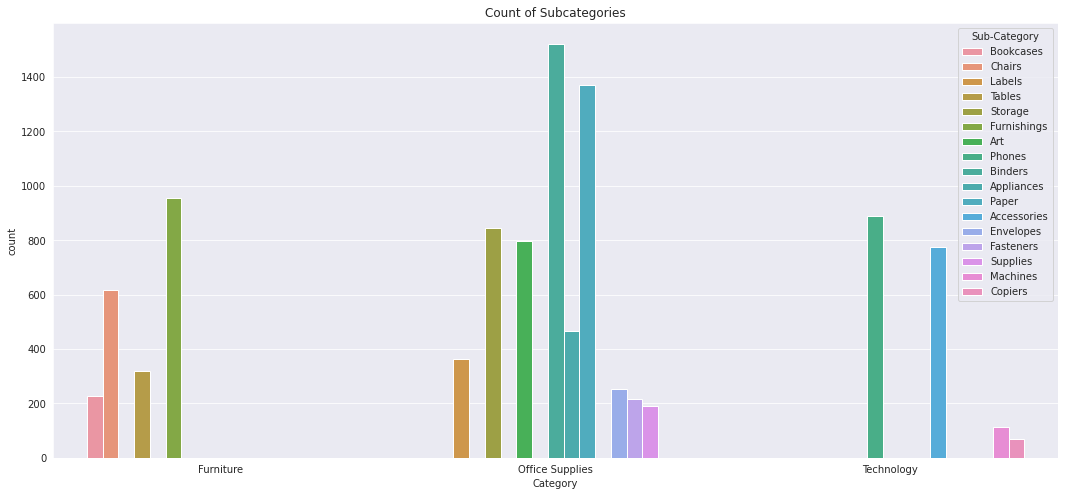

In [29]:
plt.figure(figsize=(18,8))
sns.countplot(x='Category',hue='Sub-Category',data=df)
plt.title('Count of Subcategories');

# **Sales Analysis - FURNITURE**

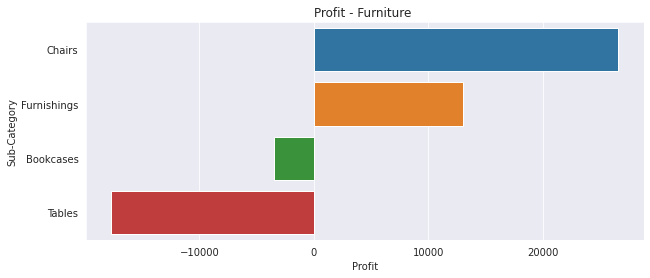

In [30]:
furn = df[df.Category == 'Furniture'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]
plt.figure(figsize=(10,4))
plt.title('Profit - Furniture ')
sns.barplot(x=furn.Profit, y=furn.index,data=furn);

# *Profit of Different Categories*

In [31]:
category_df = df.groupby('Category').sum().sort_values('Profit',ascending=False)
px.bar(category_df,x=category_df.index,y='Profit',width=500,color_discrete_sequence=['peru'],hover_data=['Sales'])

**Note:** Maximum net profit is incurred in category of Technology followed by Office Supplies and Furniture. 

For the category of Furniture, sub-categories - Tables and Bookcases need to be taken care of where losses are incurred.

In [32]:
subcategory_df = df.groupby('Sub-Category').sum().sort_values('Profit',ascending=False)
px.bar(subcategory_df,x=subcategory_df.index,y='Profit',width=800,color_discrete_sequence=['peru'])

# *Sales of Different Sub-Categories*

In [33]:
sales_df = df.groupby('Sub-Category').sum().sort_values('Sales',ascending=False)
px.bar(sales_df,x=sales_df.index,y='Sales',width=800,color_discrete_sequence=['peru'],hover_data=['Profit','Quantity'])

**Note :** Phones and Chairs have maximum sales among all the sub-categories.

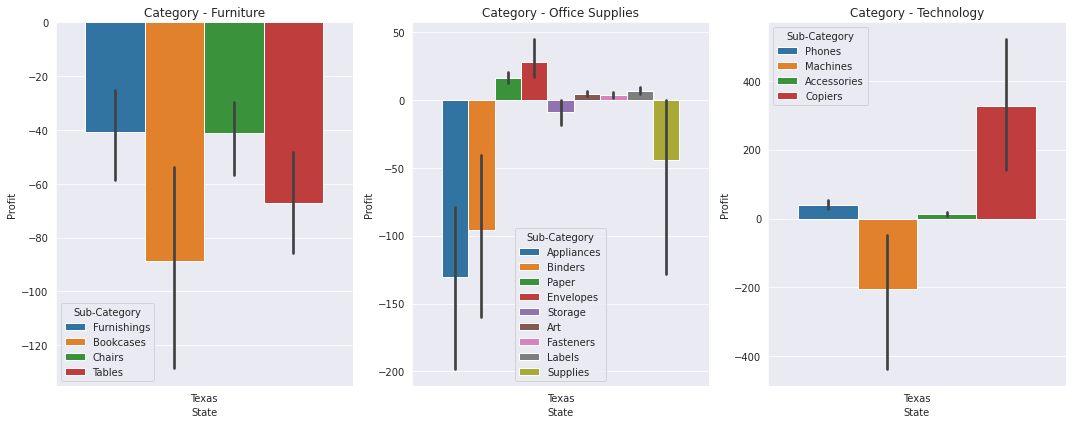

In [34]:
# Analyzing sales by category for state 'Texas'

df_Texas = df[df['State']=='Texas']
df_furn = df_Texas[df_Texas['Category']=='Furniture']
df_offc = df_Texas[df_Texas['Category']=='Office Supplies']
df_tech = df_Texas[df_Texas['Category']=='Technology']
plt.subplots(figsize=(15,6))


plt.subplot(1,3,1)
sns.barplot(x=df_furn.State, y=df_furn.Profit, hue=df_furn['Sub-Category'])
plt.title('Category - Furniture')

plt.subplot(1,3,2)
sns.barplot(x=df_offc.State, y=df_offc.Profit, hue=df_offc['Sub-Category'])
plt.title('Category - Office Supplies')

plt.subplot(1,3,3)
sns.barplot(x=df_tech.State, y=df_tech.Profit, hue=df_tech['Sub-Category'])
plt.title('Category - Technology')


plt.tight_layout()

In Texas, loss occurs in all sub-categories of Furniture, and also in some of the sub-categories of Office Supplies and Technology

# *Analysis of Feature-Discount*

In [35]:
# Available discounts

print('Available discounts : ',df.Discount.unique())

Available discounts :  [0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]


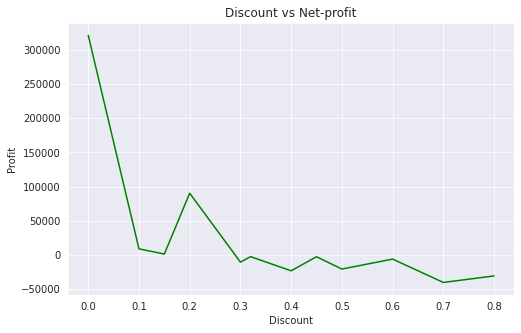

In [36]:
df_discount = df.groupby('Discount').sum()
plt.figure(figsize=(8,5))
plt.title('Discount vs Net-profit')
sns.lineplot(x=df_discount.index,y=df_discount['Profit'],color='green');

As evident from the plot, net profit decreases when discount is increased.

# Business problems that can be derived by looking into the data

1. How much is the sales, profit and quantity sold varies region-wise, state-wise and segment-wise, category-wise?

2. Which category of items gives the more profit and sold more?

3. Which type of mode is suitable for more profit?

4. Which state has the highest profit?

5. Which region has the highest sales and profit?

#**Final Conclusion**

1. The dataset contains 80.6 % cases of profit, 18.7 % cases of loss and 0.65 % cases of no-profit-no-loss . From this, we can probably say that the overall Retail store in US is working fine.

2. The count of Standard Class is maximum. In each class of Ship Mode, Consumer segment holds the majority. We may conclude that the stores prefer Consumer Segment as it may draw more profit.

3.  It is observed that Segment -'Customer' contributes to highest net profit followed by Corporate and then, Home Office.

4.  Net profit is maximum for 'Standard Class' ship mode, followed by 'Second Class', 'First Class' and 'Same Day'.

5. California, New York, Washington, Michigan, Virginia are the five states which incur maximum net profit.

6. We observe that although Texas is the third highest State with highest total sales and quantity sold, it has a negative Profit, which needs to be taken care of.

7. West Region dominates Profit, Total Sales and Total quantity sold, followed by east region.

8. Maximum net profit is incurred in category of Technology followed by Office Supplies and Furniture.

9. For the category of Furniture, sub-categories - Tables and Bookcases need to be taken care of where losses are incurred.

10. Net profit decreases when discount is increased